In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mac = 0.1091667 #ft, mean aerodynamic chord
S = 0.0604 # ft^2,planform area of both wings
weight = 1.702143653 #lbf, weight of both wings

In [3]:
plt.style.use('seaborn') # pretty matplotlib plots
#plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth']=0.5
plt.rcParams['lines.linestyle'] ='-'

In [4]:
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)


### reading in data

In [5]:
file_name = 'designlab_#{}.csv'
df_list = []
for i in range(1, 5):
    df_list.append(pd.read_csv(file_name.format(i),skiprows=3))
    df_list[i-1] = df_list[i-1].drop(labels=0,axis=0)
    df_list[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
       'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
       'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    
for m in range(len(df_list)):
    df_list[m] = df_list[m].astype(float)
    df_list[m] = df_list[m].round(decimals=3)
    df_list[m]['Angle of Attack[rad]'] = np.radians(df_list[m]['Angle of Attack[deg]'])


In [6]:
file_name = 'designlab_yaw#{}.csv'
df_list_yaw = []
for i in range(1, 3):
    df_list_yaw.append(pd.read_csv(file_name.format(i),skiprows=3))
    df_list_yaw[i-1] = df_list_yaw[i-1].drop(labels=0,axis=0)
    df_list_yaw[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
       'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
       'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    df_list_yaw[i-1] = df_list_yaw[i-1].round(decimals=3)

for m in range(len(df_list_yaw)):
    df_list_yaw[m] = df_list_yaw[m].astype(float)
    df_list_yaw[m] = df_list_yaw[m].round(decimals=3)
    df_list_yaw[m]['Angle of Attack[rad]'] = np.radians(df_list_yaw[m]['Angle of Attack[deg]'])
   

In [7]:
file_name = 'upsidedown_#{}.csv'
df_upsideDown = []
for i in range(1, 3):
    df_upsideDown.append(pd.read_csv(file_name.format(i),skiprows=3))
    df_upsideDown[i-1] = df_upsideDown[i-1].drop(labels=0,axis=0)
    df_upsideDown[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
       'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
       'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    df_upsideDown[i-1] = df_upsideDown[i-1].round(decimals=3)
    
for m in range(len(df_list_yaw)):
    df_upsideDown[m] = df_upsideDown[m].astype(float)
    df_upsideDown[m] = df_upsideDown[m].round(decimals=3)
    df_upsideDown[m]['Angle of Attack[rad]'] = np.radians(df_upsideDown[m]['Angle of Attack[deg]'])


# Question3.

### this section below processes data for the first three trials where velocity changes from 40ft/s to 120ft/s as AOA ranges from -5 deg to +19 deg

In [8]:
len(df_list)

4

In [9]:
df_list[1].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]'],
      dtype='object')

In [10]:
df_list[1].index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

$\mathrm{L}=\mathrm{N} \cos (\boldsymbol{\alpha})-\mathrm{A} \sin (\boldsymbol{\alpha})$


$\mathrm{D}=\mathrm{N} \sin (\boldsymbol{\alpha})+\mathrm{A} \cos (\boldsymbol{\alpha})$





In [11]:
#this is the offset in normal and axial force caused by the raw weight of the wings
lift_list0 = []
drag_list0 = []

N0 = df_list[0]['Normal Force[Lbf]'].astype(float)
A0 = df_list[0]['Axial Force[Lbf]'].astype(float)
M0 = df_list[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
alpha = df_list[0]['Angle of Attack[rad]'].astype(float)
lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



#CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
#CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

df_list[0] = df_list[0].round(decimals=3)
df_list[0]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,Avg Velocity[ft/s],Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad]
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.013,-0.001,11.096,5448.118,-0.111,-0.190,-0.740,-0.087
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.078,-0.000,4.151,2038.279,-0.096,-0.192,-0.742,-0.054
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.894,-0.000,3.643,1788.943,-0.080,-0.192,-0.743,-0.016
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.006,-0.000,3.601,1768.058,-0.072,-0.193,-0.742,-0.000
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.112,-0.000,4.160,2042.667,-0.065,-0.193,-0.743,0.019
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.073,-0.000,3.546,1741.161,-0.047,-0.191,-0.743,0.054
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.018,-0.000,3.538,1737.142,-0.032,-0.191,-0.741,0.088
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.845,-0.000,3.454,1695.831,-0.023,-0.190,-0.739,0.119
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.946,-0.000,3.516,1726.441,0.000,-0.189,-0.733,0.156
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.928,-0.000,3.380,1659.461,0.010,-0.187,-0.731,0.191


### negative when alpha > 0? this is not right...

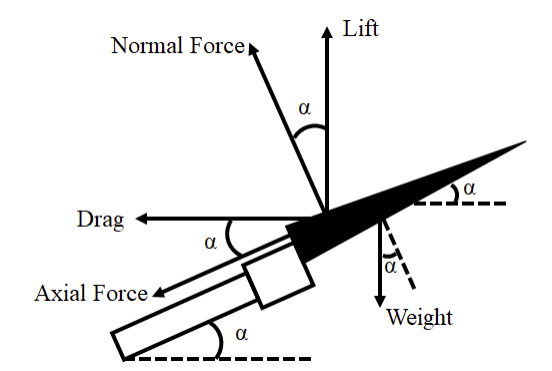|

In [12]:
df_list[0].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]'],
      dtype='object')

In [13]:
N1 = (df_list[1]['Normal Force[Lbf]']-N0).astype(float)
A1 = (df_list[1]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list[1]['Angle of Attack[rad]'].astype(float)
lift1 = N1*np.cos(alpha)-A1*np.sin(alpha)
drag1 = N1*np.sin(alpha)+A1*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_1 = lift1/(df_list[1]['Corrected q']*144*S)
CD_1 = drag1/(df_list[1]['Corrected q']*144*S)
    
df_list[1]['Lift[Lbf]']=lift1
df_list[1]['Drag[Lbf]']=drag1
df_list[1]['Lift Coef'] = CL_1
df_list[1]['Drag Coef'] = CD_1

df_list[1]['Pitching Mom[in-Lbf]'] = df_list[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list[1]['Moment Coef'] =  df_list[1]['Pitching Mom[in-Lbf]'] /(df_list[1]['Corrected q']*144*S*mac)                     

df_list[1]


,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.022,0.013,...,19759.947,0.019,-0.053,0.040167,-0.087650,0.147854,0.117508,1.307647,1.039263,3.254119
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.054,0.012,...,19199.682,0.026,-0.014,0.055583,-0.053302,0.184247,0.112343,1.765305,1.076383,4.878359
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.069,0.013,...,19698.975,0.035,0.001,0.061750,-0.018658,0.195112,0.111379,1.725603,0.985058,5.002693
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.055,0.012,...,19556.205,0.051,0.003,0.063083,0.000960,0.195882,0.123188,1.876781,1.180288,5.536605
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.945,0.012,...,19398.852,0.052,0.009,0.065250,0.016493,0.200043,0.120316,1.916648,1.152766,5.726766
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.071,0.013,...,19801.791,0.061,0.040,0.078000,0.053599,0.224882,0.120220,1.988898,1.063250,6.319186
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,4.959,0.013,...,19890.195,0.081,0.062,0.086333,0.086551,0.242285,0.134447,2.142810,1.189073,6.994311
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.985,0.013,...,19709.471,0.082,0.082,0.094000,0.121911,0.257212,0.137298,2.274829,1.214291,7.615426
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.944,0.012,...,19523.682,0.110,0.078,0.090083,0.156102,0.246652,0.150173,2.363218,1.438833,7.906293
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.935,0.012,...,19280.430,0.126,0.085,0.092167,0.190852,0.245057,0.165491,2.347934,1.585599,8.089139


In [14]:
N2 = (df_list[2]['Normal Force[Lbf]']-N0).astype(float)
A2 = (df_list[2]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list[2]['Angle of Attack[rad]'].astype(float)
lift2 = N2*np.cos(alpha)-A2*np.sin(alpha)
drag2 = N2*np.sin(alpha)+A2*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_2 = lift2/(df_list[2]['Corrected q']*144*S)
CD_2 = drag2/(df_list[2]['Corrected q']*144*S)
    
df_list[2]['Lift[Lbf]']=lift2
df_list[2]['Drag[Lbf]']=drag2
df_list[2]['Lift Coef'] = CL_2
df_list[2]['Drag Coef'] = CD_2

df_list[2]['Pitching Mom[in-Lbf]'] = df_list[2]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list[2]['Moment Coef'] =  df_list[2]['Pitching Mom[in-Lbf]'] /(df_list[2]['Corrected q']*144*S*mac)                     

df_list[2]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-4.995,0.051,...,39707.570,0.016,-0.196,-0.022333,-0.087179,0.005081,0.127040,0.011454,0.286399,-0.461198
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.083,0.049,...,39037.227,0.035,-0.122,0.008500,-0.053809,0.076944,0.127046,0.180543,0.298102,0.182702
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.091,0.050,...,39423.418,0.050,-0.013,0.053417,-0.019042,0.181443,0.126568,0.417225,0.291042,1.125168
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.006,0.049,...,39079.285,0.062,0.028,0.071083,-0.000105,0.221014,0.133977,0.518590,0.314365,1.527854
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.017,0.051,...,39602.863,0.066,0.090,0.097000,0.017750,0.280630,0.136002,0.632652,0.306603,2.003140
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.070,0.050,...,39442.051,0.074,0.194,0.140833,0.053582,0.377967,0.141445,0.869130,0.325252,2.966503
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.023,0.050,...,39411.465,0.081,0.267,0.171416,0.087668,0.446347,0.152667,1.026369,0.351054,3.610707
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.978,0.050,...,39396.707,0.090,0.340,0.200499,0.121789,0.512346,0.176552,1.178132,0.405978,4.223315
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.964,0.050,...,39114.594,0.104,0.384,0.216083,0.156451,0.549797,0.192011,1.264250,0.441527,4.551561
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.900,0.050,...,39147.984,0.140,0.398,0.211583,0.190241,0.549863,0.238275,1.264403,0.547911,4.456773


In [15]:
N3 = (df_list[3]['Normal Force[Lbf]']-N0).astype(float)
A3 = (df_list[3]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list[3]['Angle of Attack[rad]'].astype(float)
lift3 = N3*np.cos(alpha)-A3*np.sin(alpha)
drag3 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_3 = lift3/(df_list[3]['Corrected q']*144*S)
CD_3 = drag3/(df_list[3]['Corrected q']*144*S)
    
df_list[3]['Lift[Lbf]']=lift3
df_list[3]['Drag[Lbf]']=drag3
df_list[3]['Lift Coef'] = CL_3
df_list[3]['Drag Coef'] = CD_3

df_list[3]['Pitching Mom[in-Lbf]'] = df_list[3]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list[3]['Moment Coef'] =  df_list[3]['Pitching Mom[in-Lbf]'] /(df_list[3]['Corrected q']*144*S*mac)                     

df_list[3]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.016,0.116,...,59851.941,0.048,-0.500,-0.150333,-0.087546,-0.294911,0.185496,-0.292303,0.183855,-1.364914
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.052,0.113,...,59066.934,0.074,-0.273,-0.056916,-0.053267,-0.071834,0.174071,-0.073089,0.177113,-0.530479
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.085,0.112,...,58717.352,0.062,-0.046,0.037917,-0.018937,0.148663,0.139210,0.152611,0.142907,0.356552
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.049,0.111,...,58656.789,0.099,0.116,0.104583,0.000855,0.308854,0.171264,0.319912,0.177396,0.992314
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.980,0.110,...,58359.844,0.099,0.226,0.151416,0.017104,0.416134,0.171142,0.434951,0.178881,1.449741
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.012,0.112,...,58879.484,0.100,0.450,0.245416,0.052569,0.632390,0.180478,0.649184,0.185271,2.307784
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.025,0.112,...,58736.617,0.091,0.676,0.339332,0.087703,0.852894,0.198468,0.875543,0.203739,3.190931
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.968,0.108,...,57799.965,0.066,0.801,0.391082,0.121615,0.972884,0.208566,1.035709,0.222034,3.813770
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.947,0.112,...,58899.160,0.101,0.914,0.428915,0.156155,1.073872,0.271310,1.102389,0.278515,4.033330
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.908,0.111,...,58405.758,0.132,1.009,0.457582,0.190381,1.151305,0.346118,1.192526,0.358510,4.341663


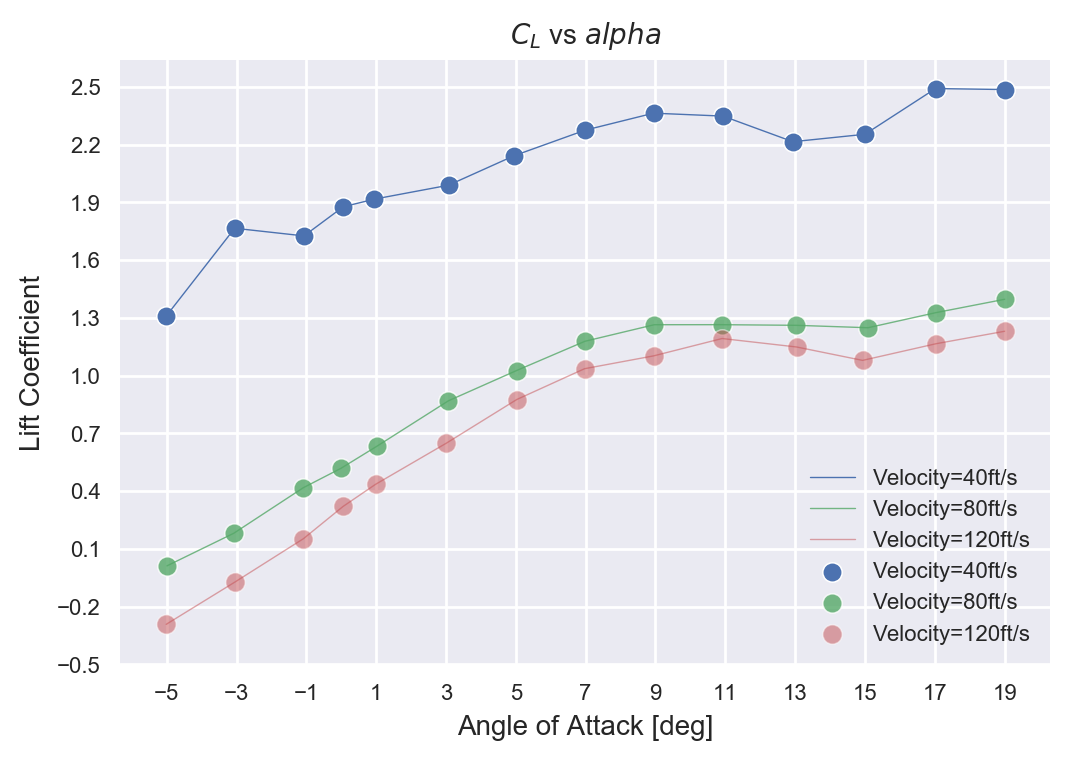

In [68]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');
sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');

sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));
plt.yticks(np.arange(-0.5,2.7,step=0.3));
plt.ylabel('Lift Coefficient',fontsize=10);
plt.xlabel('Angle of Attack [deg]',fontsize=10);
plt.title('$C_L$ vs $alpha$',fontsize=10)
plt.savefig('lift_plot1.png',dpi=200);

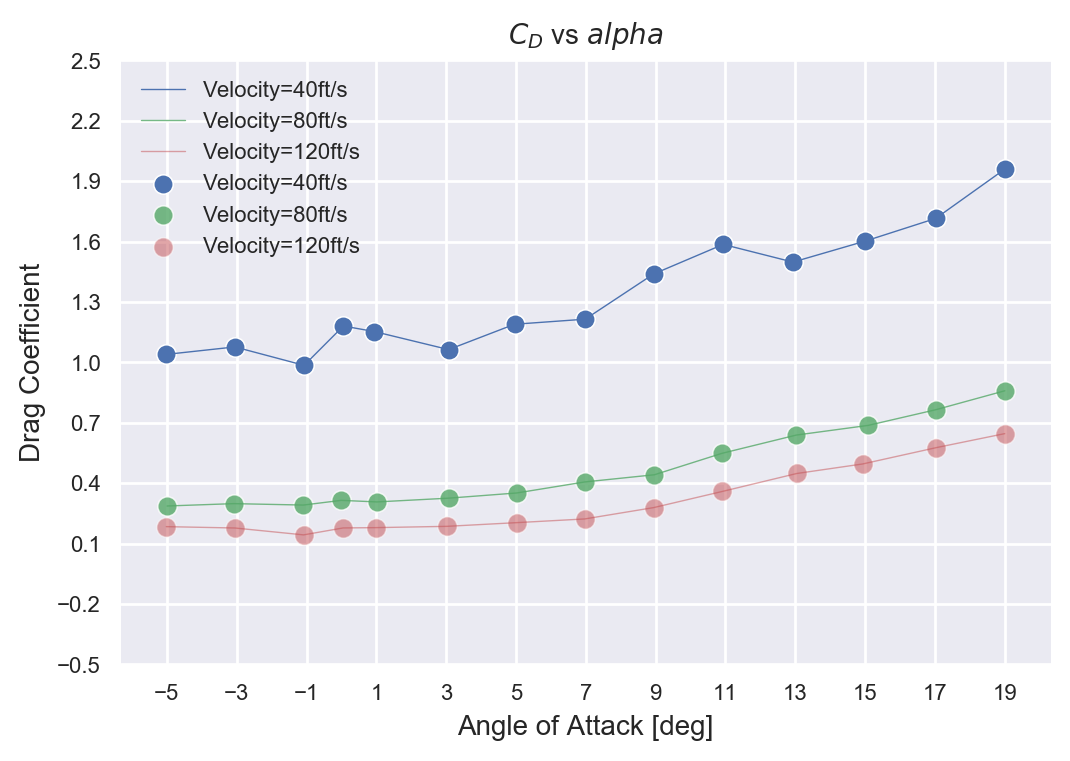

In [69]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[1],label='Velocity=40ft/s');
sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[1],label='Velocity=40ft/s');

sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));
plt.yticks(np.arange(-0.5,2.7,step=0.3));
plt.ylabel('Drag Coefficient',fontsize=10);
plt.xlabel('Angle of Attack [deg]',fontsize=10);
plt.title('$C_D$ vs $alpha$',fontsize=10);
plt.savefig('drag_plot1.png',dpi=200);

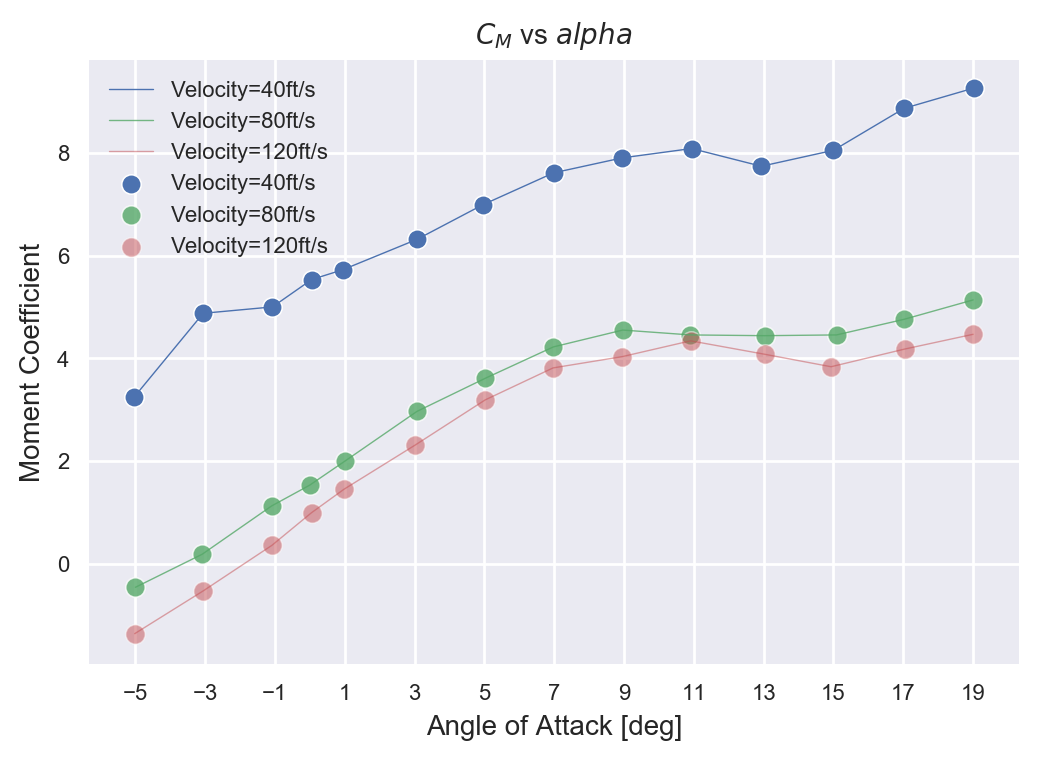

In [70]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[1],label='Velocity=40ft/s');
sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[1],label='Velocity=40ft/s');

sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));

plt.ylabel('Moment Coefficient',fontsize=10);
plt.xlabel('Angle of Attack [deg]',fontsize=10);
plt.title('$C_M$ vs $alpha$',fontsize=10);
plt.savefig('moment_plot1.png',dpi=200);

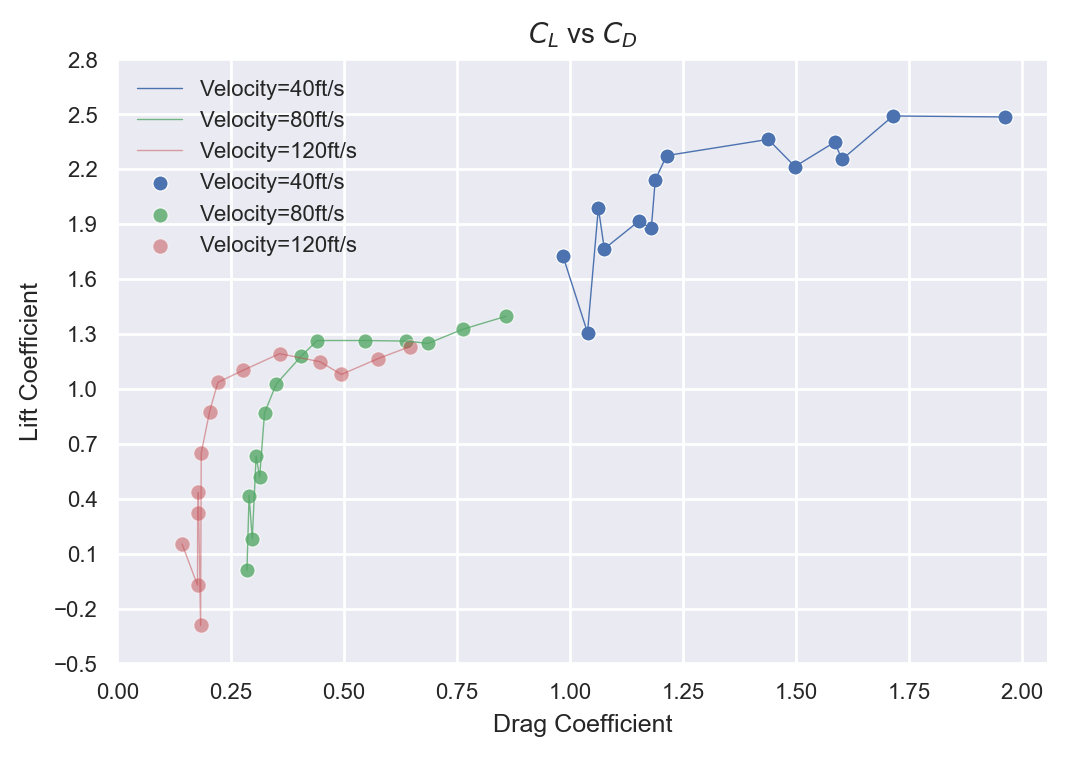

In [124]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s',s=30);
sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');

sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8,s=30);
sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5,s=30);
sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
plt.yticks(np.arange(-0.5,3.1,step=0.3));
plt.xticks(np.arange(0,2.25,step=0.25));
plt.ylabel('Lift Coefficient',fontsize=9);
plt.xlabel('Drag Coefficient',fontsize=9);
plt.title('$C_L$ vs $C_D$',fontsize=10);
plt.savefig('CL_vs_CD.png',dpi=200);

### this section below processes data for the test trials when the prototype is rotated 90 degrees

In [73]:

lift_list0 = []
drag_list0 = []

N0 = df_list_yaw[0]['Normal Force[Lbf]'].astype(float)
A0 = df_list_yaw[0]['Axial Force[Lbf]'].astype(float)
M0 = df_list_yaw[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
alpha = df_list_yaw[0]['Angle of Attack[rad]'].astype(float)
lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



#CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
#CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

df_list_yaw[0] = df_list[0].round(decimals=3)
df_list_yaw[0]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,Avg Velocity[ft/s],Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad]
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.013,-0.001,11.096,5448.118,-0.111,-0.190,-0.740,-0.087
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.078,-0.000,4.151,2038.279,-0.096,-0.192,-0.742,-0.054
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.894,-0.000,3.643,1788.943,-0.080,-0.192,-0.743,-0.016
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.006,-0.000,3.601,1768.058,-0.072,-0.193,-0.742,-0.000
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.112,-0.000,4.160,2042.667,-0.065,-0.193,-0.743,0.019
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.073,-0.000,3.546,1741.161,-0.047,-0.191,-0.743,0.054
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.018,-0.000,3.538,1737.142,-0.032,-0.191,-0.741,0.088
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.845,-0.000,3.454,1695.831,-0.023,-0.190,-0.739,0.119
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.946,-0.000,3.516,1726.441,0.000,-0.189,-0.733,0.156
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.928,-0.000,3.380,1659.461,0.010,-0.187,-0.731,0.191


In [74]:
N1 = (df_list_yaw[1]['Normal Force[Lbf]']-N0).astype(float)
A1 = (df_list_yaw[1]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list_yaw[1]['Angle of Attack[rad]'].astype(float)
lift1 = N3*np.cos(alpha)-A3*np.sin(alpha)
drag1 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_1 = lift1/(df_list_yaw[1]['Corrected q']*144*S)
CD_1 = drag1/(df_list_yaw[1]['Corrected q']*144*S)
    
df_list_yaw[1]['Lift[Lbf]']=lift1
df_list_yaw[1]['Drag[Lbf]']=drag1
df_list_yaw[1]['Lift Coef'] = CL_1
df_list_yaw[1]['Drag Coef'] = CD_1

df_list_yaw[1]['Pitching Mom[in-Lbf]'] = df_list_yaw[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list_yaw[1]['Moment Coef'] =  df_list_yaw[1]['Pitching Mom[in-Lbf]'] /(df_list_yaw[1]['Corrected q']*144*S*mac)                     

df_list_yaw[1]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-10.002,0.020,...,24645.918,0.020,-0.025,0.060660,-0.174568,-0.277673,0.210425,-1.596262,1.209673,3.194337
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-8.079,0.019,...,24325.592,0.034,-0.018,0.060993,-0.141005,-0.056305,0.179696,-0.340715,1.087393,3.380937
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-6.105,0.019,...,24162.832,0.046,-0.014,0.061236,-0.106552,0.160274,0.125667,0.969861,0.760448,3.394410
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-4.032,0.019,...,24417.805,0.070,-0.011,0.061299,-0.070372,0.320259,0.148850,1.937975,0.900732,3.397874
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.989,0.019,...,24196.785,0.079,-0.007,0.061514,-0.034715,0.424440,0.149359,2.568401,0.903811,3.409807
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.011,0.020,...,24606.002,0.097,-0.002,0.061653,0.000192,0.640972,0.147123,3.684762,0.845768,3.246631
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.958,0.019,...,24316.768,0.115,0.001,0.061625,0.034174,0.862291,0.152551,5.217963,0.923128,3.415966
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,4.039,0.019,...,24334.029,0.129,0.004,0.061590,0.070494,0.982270,0.158581,5.943987,0.959614,3.414041
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.939,0.019,...,24368.867,0.149,0.011,0.061271,0.103655,1.086629,0.214585,6.575494,1.298512,3.396334
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.065,0.019,...,23978.477,0.163,0.016,0.061229,0.140761,1.167055,0.288588,7.062171,1.746325,3.394024


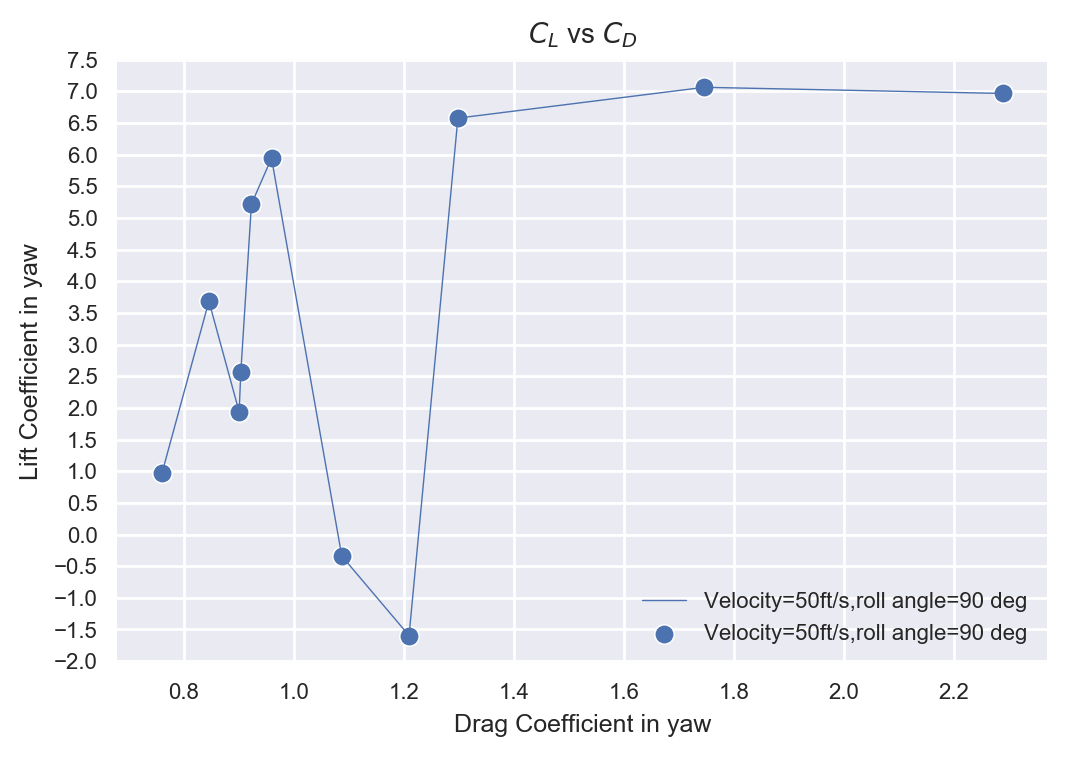

In [83]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list_yaw[1],label='Velocity=50ft/s,roll angle=90 deg');
sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list_yaw[1],label='Velocity=50ft/s,roll angle=90 deg');

plt.legend(fontsize=8)
plt.yticks(np.arange(-2,8,step=0.5));
#plt.xticks(np.arange(-2,8,step=0.5));
plt.ylabel('Lift Coefficient in yaw',fontsize=9);
plt.xlabel('Drag Coefficient in yaw',fontsize=9);
plt.title('$C_L$ vs $C_D$',fontsize=10);
plt.savefig('CL_vs_CD_yaw.png',dpi=200);

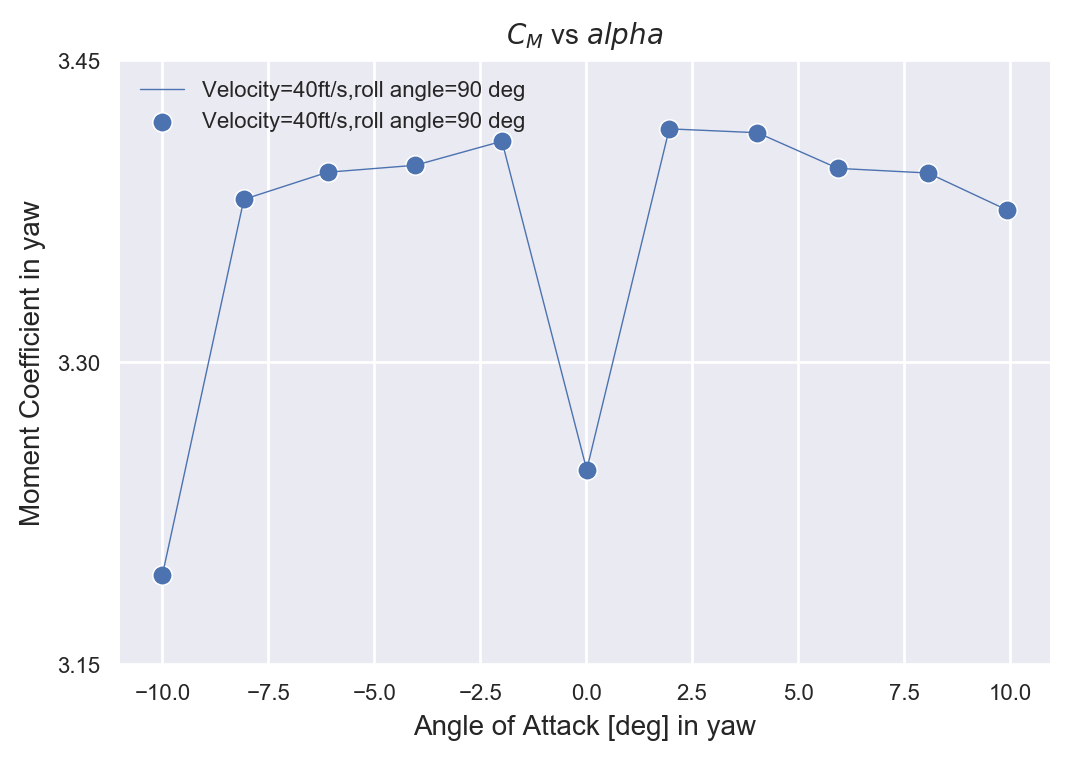

In [84]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
plt.legend(fontsize=8)
plt.yticks(np.arange(3.15,3.45,step=0.15));
#plt.xticks(np.arange(-10,12,step=2));

plt.ylabel('Moment Coefficient in yaw',fontsize=10);
plt.xlabel('Angle of Attack [deg] in yaw',fontsize=10);
plt.title('$C_M$ vs $alpha$',fontsize=10);
plt.savefig('moment_yaw.png',dpi=200);

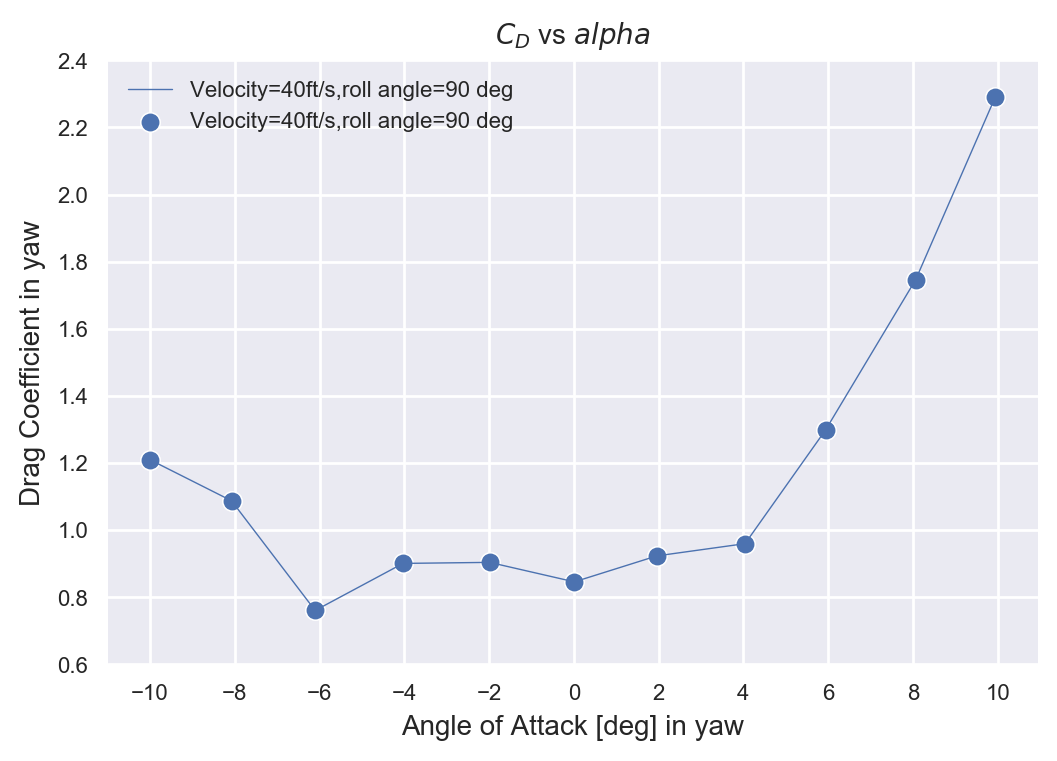

In [85]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');

plt.legend(fontsize=8)
plt.yticks(np.arange(0.6,2.6,step=0.2));
plt.xticks(np.arange(-10,12,step=2));
#plt.yticks(np.arange(-0.5,2.7,step=0.3));
plt.ylabel('Drag Coefficient in yaw',fontsize=10);
plt.xlabel('Angle of Attack [deg] in yaw',fontsize=10);
plt.title('$C_D$ vs $alpha$',fontsize=10);
plt.savefig('drag_plot_yaw.png',dpi=200);

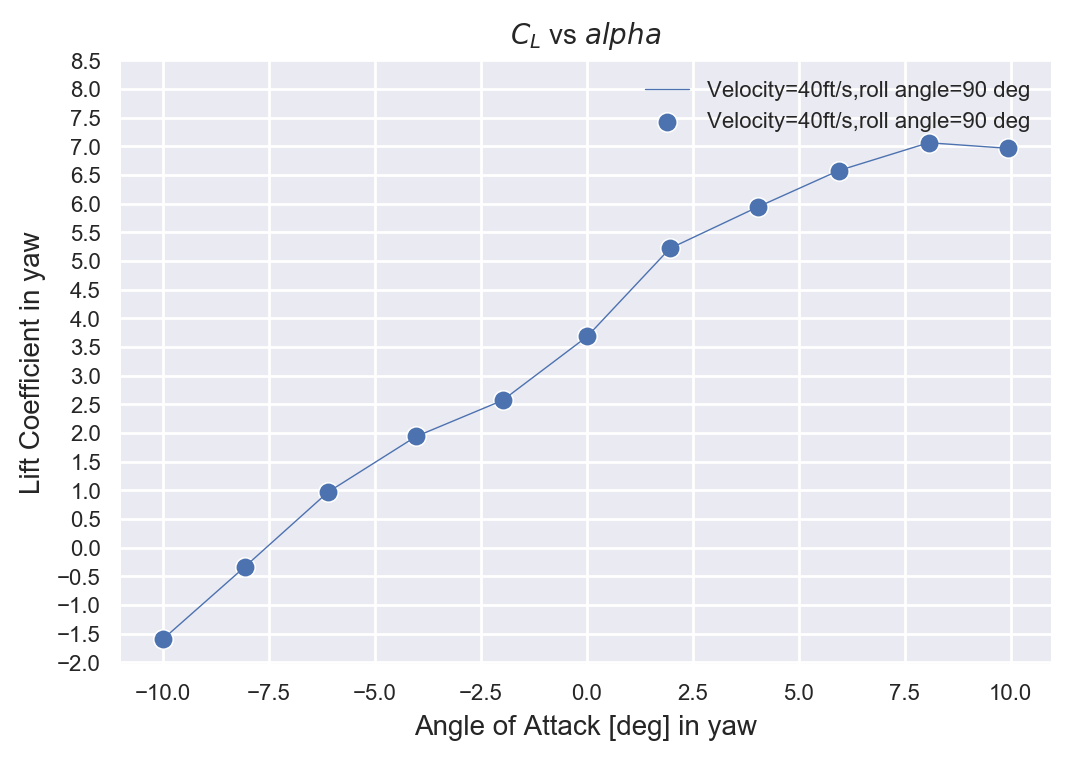

In [86]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
plt.legend(fontsize=8)
plt.yticks(np.arange(-2,9,step=0.5));
#plt.xticks(np.arange(-5,21,step=2));
#plt.yticks(np.arange(-0.5,2.7,step=0.3));
plt.ylabel('Lift Coefficient in yaw',fontsize=10);
plt.xlabel('Angle of Attack [deg] in yaw',fontsize=10);
plt.title('$C_L$ vs $alpha$',fontsize=10)
plt.savefig('lift_plot_yaw.png',dpi=200);

### this section below processes data for the test trials when the prototype is rotated 180 degrees (upside down)

In [87]:

lift_list0 = []
drag_list0 = []

N0 = df_upsideDown[0]['Normal Force[Lbf]'].astype(float)
A0 = df_upsideDown[0]['Axial Force[Lbf]'].astype(float)
M0 = df_upsideDown[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
alpha = df_upsideDown[0]['Angle of Attack[rad]'].astype(float)
lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



#CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
#CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

df_upsideDown[0] = df_upsideDown[0].round(decimals=3)
df_upsideDown[0]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,Avg Velocity[ft/s],Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad]
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.019,0.001,9.508,4668.310,0.041,-0.004,-0.008,-0.088
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.058,0.001,9.481,4655.187,0.057,-0.004,-0.009,-0.053
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.968,0.001,9.635,4730.604,0.075,-0.006,-0.011,-0.017
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.009,0.001,9.845,4833.678,0.083,-0.004,-0.010,0.000
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.962,0.001,9.697,4761.215,0.089,-0.007,-0.010,0.017
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.073,0.001,9.730,4777.548,0.107,-0.005,-0.008,0.054
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.029,0.001,9.537,4682.569,0.124,-0.004,-0.006,0.088
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.975,0.001,9.535,4681.881,0.140,-0.003,-0.004,0.122
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.957,0.001,9.714,4769.701,0.157,-0.001,0.001,0.156
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,11.051,0.001,9.823,4822.977,0.172,0.001,0.005,0.193


In [88]:
N1 = (df_upsideDown[1]['Normal Force[Lbf]']-N0).astype(float)
A1 = (df_upsideDown[1]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_upsideDown[1]['Angle of Attack[rad]'].astype(float)
lift1 = N3*np.cos(alpha)-A3*np.sin(alpha)
drag1 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_1 = lift1/(df_upsideDown[1]['Corrected q']*144*S)
CD_1 = drag1/(df_upsideDown[1]['Corrected q']*144*S)
    
df_upsideDown[1]['Lift[Lbf]']=lift1
df_upsideDown[1]['Drag[Lbf]']=drag1
df_upsideDown[1]['Lift Coef'] = CL_1
df_upsideDown[1]['Drag Coef'] = CD_1

df_upsideDown[1]['Pitching Mom[in-Lbf]'] = df_upsideDown[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_upsideDown[1]['Moment Coef'] =  df_upsideDown[1]['Pitching Mom[in-Lbf]'] /(df_upsideDown[1]['Corrected q']*144*S*mac)                     
df_upsideDown[1]


,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.013,0.050,...,39377.668,0.017,-0.239,-0.007458,-0.087493,-0.294921,0.185480,-0.678165,0.426509,-0.157101
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.063,0.050,...,39134.332,0.035,-0.156,-0.004465,-0.053459,-0.071801,0.174085,-0.165104,0.400306,-0.094056
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.085,0.051,...,39728.898,0.063,-0.038,-0.000146,-0.018937,0.148663,0.139210,0.335145,0.313834,-0.003011
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.002,0.051,...,39602.441,0.066,0.005,0.001236,0.000035,0.308994,0.171011,0.696595,0.385526,0.025527
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.073,0.050,...,39446.863,0.069,0.048,0.002667,0.018727,0.415855,0.171818,0.956253,0.395092,0.056170
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.048,0.051,...,39643.320,0.075,0.155,0.006250,0.053198,0.632277,0.180876,1.425403,0.407766,0.129068
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.001,0.051,...,39523.723,0.079,0.237,0.008805,0.087284,0.852977,0.198111,1.922949,0.446621,0.181842
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.992,0.050,...,39165.148,0.081,0.317,0.011361,0.122033,0.972796,0.208973,2.236930,0.480531,0.239308
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.956,0.051,...,39777.387,0.093,0.416,0.014132,0.156312,1.073829,0.271479,2.420837,0.612022,0.291836
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,11.051,0.051,...,39730.648,0.135,0.439,0.013944,0.192876,1.150437,0.348990,2.593542,0.786763,0.287964


In [89]:
df_upsideDown[1].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]',
       'Lift[Lbf]', 'Drag[Lbf]', 'Lift Coef', 'Drag Coef', 'Moment Coef'],
      dtype='object')

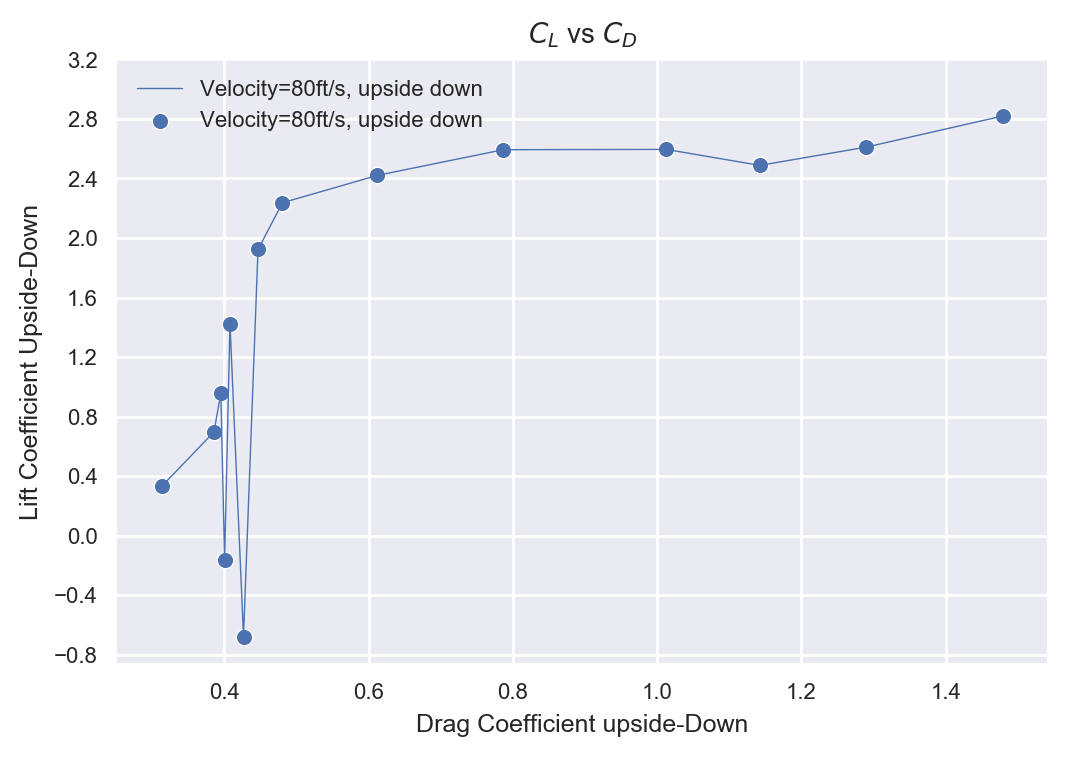

In [91]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down',s=35);
sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
plt.legend(fontsize=8)
plt.yticks(np.arange(-0.8,3.4,step=0.4));
#plt.xticks(np.arange(-0.8,3.2,step=0.2));
plt.ylabel('Lift Coefficient Upside-Down',fontsize=9);
plt.xlabel('Drag Coefficient upside-Down',fontsize=9);
plt.title('$C_L$ vs $C_D$',fontsize=10);
plt.savefig('CL_vs_CD_upside_down.png',dpi=200);

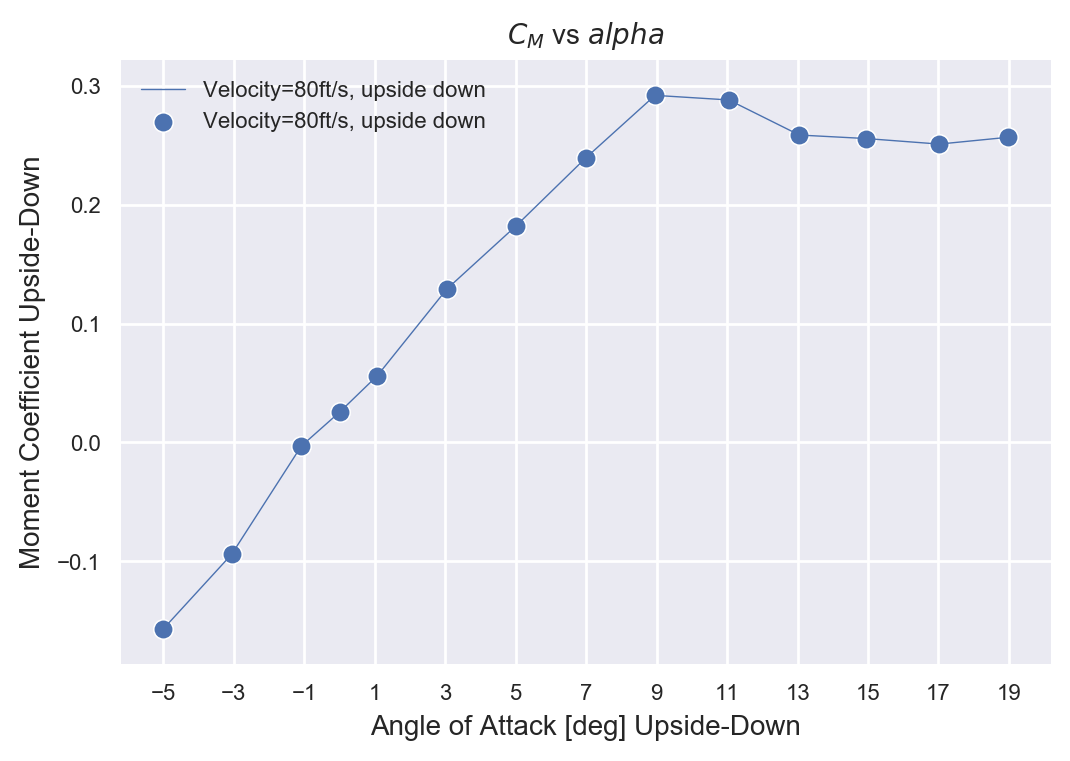

In [92]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));

plt.ylabel('Moment Coefficient Upside-Down',fontsize=10);
plt.xlabel('Angle of Attack [deg] Upside-Down',fontsize=10);
plt.title('$C_M$ vs $alpha$',fontsize=10);
plt.savefig('moment_Upside-Down.png',dpi=200);

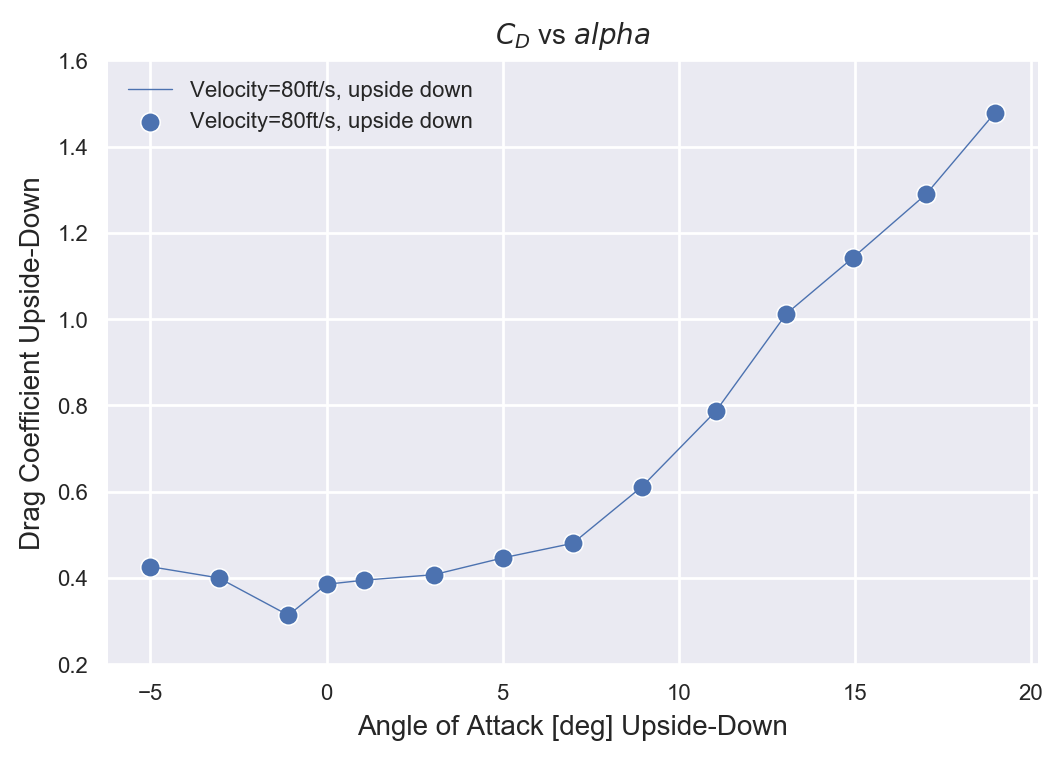

In [93]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
plt.legend(fontsize=8)
plt.yticks(np.arange(0.2,1.8,step=0.2));
#plt.xticks(np.arange(-5,21,step=2));
#plt.yticks(np.arange(-0.1,2.1,step=0.3));
plt.ylabel('Drag Coefficient Upside-Down',fontsize=10);
plt.xlabel('Angle of Attack [deg] Upside-Down',fontsize=10);
plt.title('$C_D$ vs $alpha$',fontsize=10);
plt.savefig('drag_plot_Upside-Down.png',dpi=200);

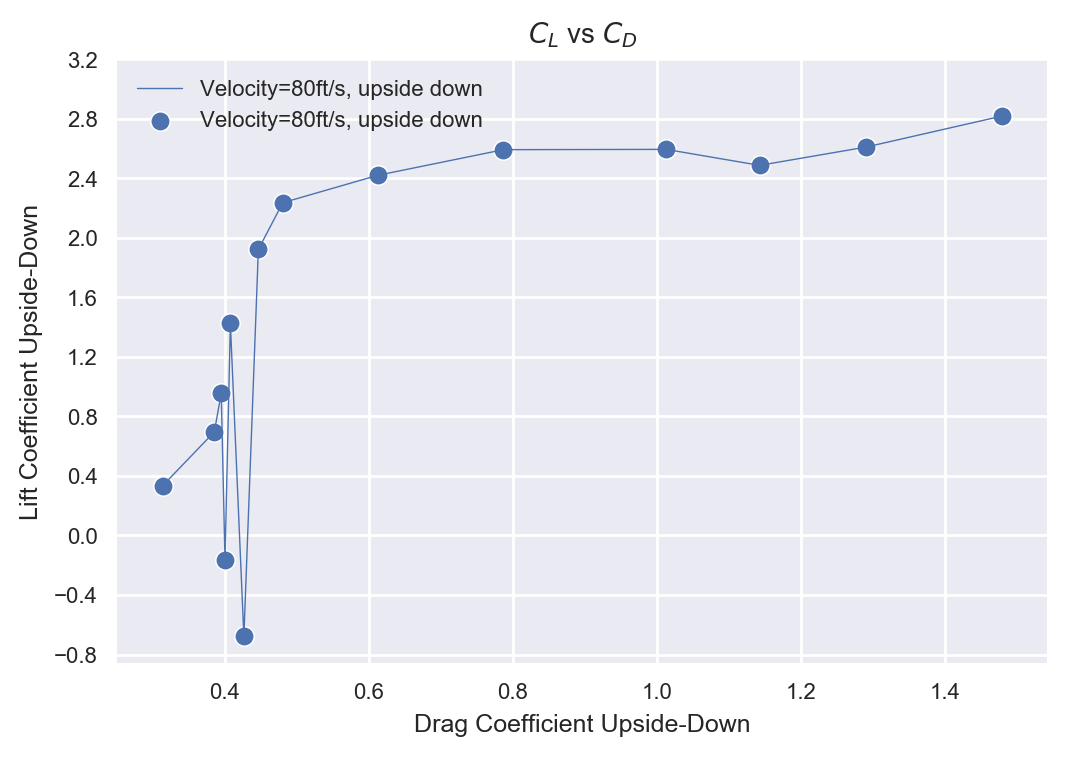

In [95]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
plt.legend(fontsize=8,loc = 'upper left')
plt.yticks(np.arange(-0.8,3.4,step=0.4));
#plt.xticks(np.arange(-0.8,3.0,step=0.2));
plt.ylabel('Lift Coefficient Upside-Down',fontsize=9);
plt.xlabel('Drag Coefficient Upside-Down',fontsize=9);
plt.title('$C_L$ vs $C_D$',fontsize=10);
plt.savefig('CL_vs_CD_Upside-Down.png',dpi=200);

## Question 4.Lift-to-drag ratios

In [96]:
df_upsideDown[1].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]',
       'Lift[Lbf]', 'Drag[Lbf]', 'Lift Coef', 'Drag Coef', 'Moment Coef'],
      dtype='object')

In [97]:
np.mean(df_upsideDown[1]['Reynolds number'])

39390.96528571429

In [98]:
np.mean(df_list_yaw[1]['Reynolds number'])

24328.198727272727

In [99]:
np.mean(df_list[1]['Reynolds number'])

19562.79892857143

In [100]:
np.mean(df_list[2]['Reynolds number'])

39194.33428571428

In [101]:
np.mean(df_list[3]['Reynolds number'])

58755.13314285715

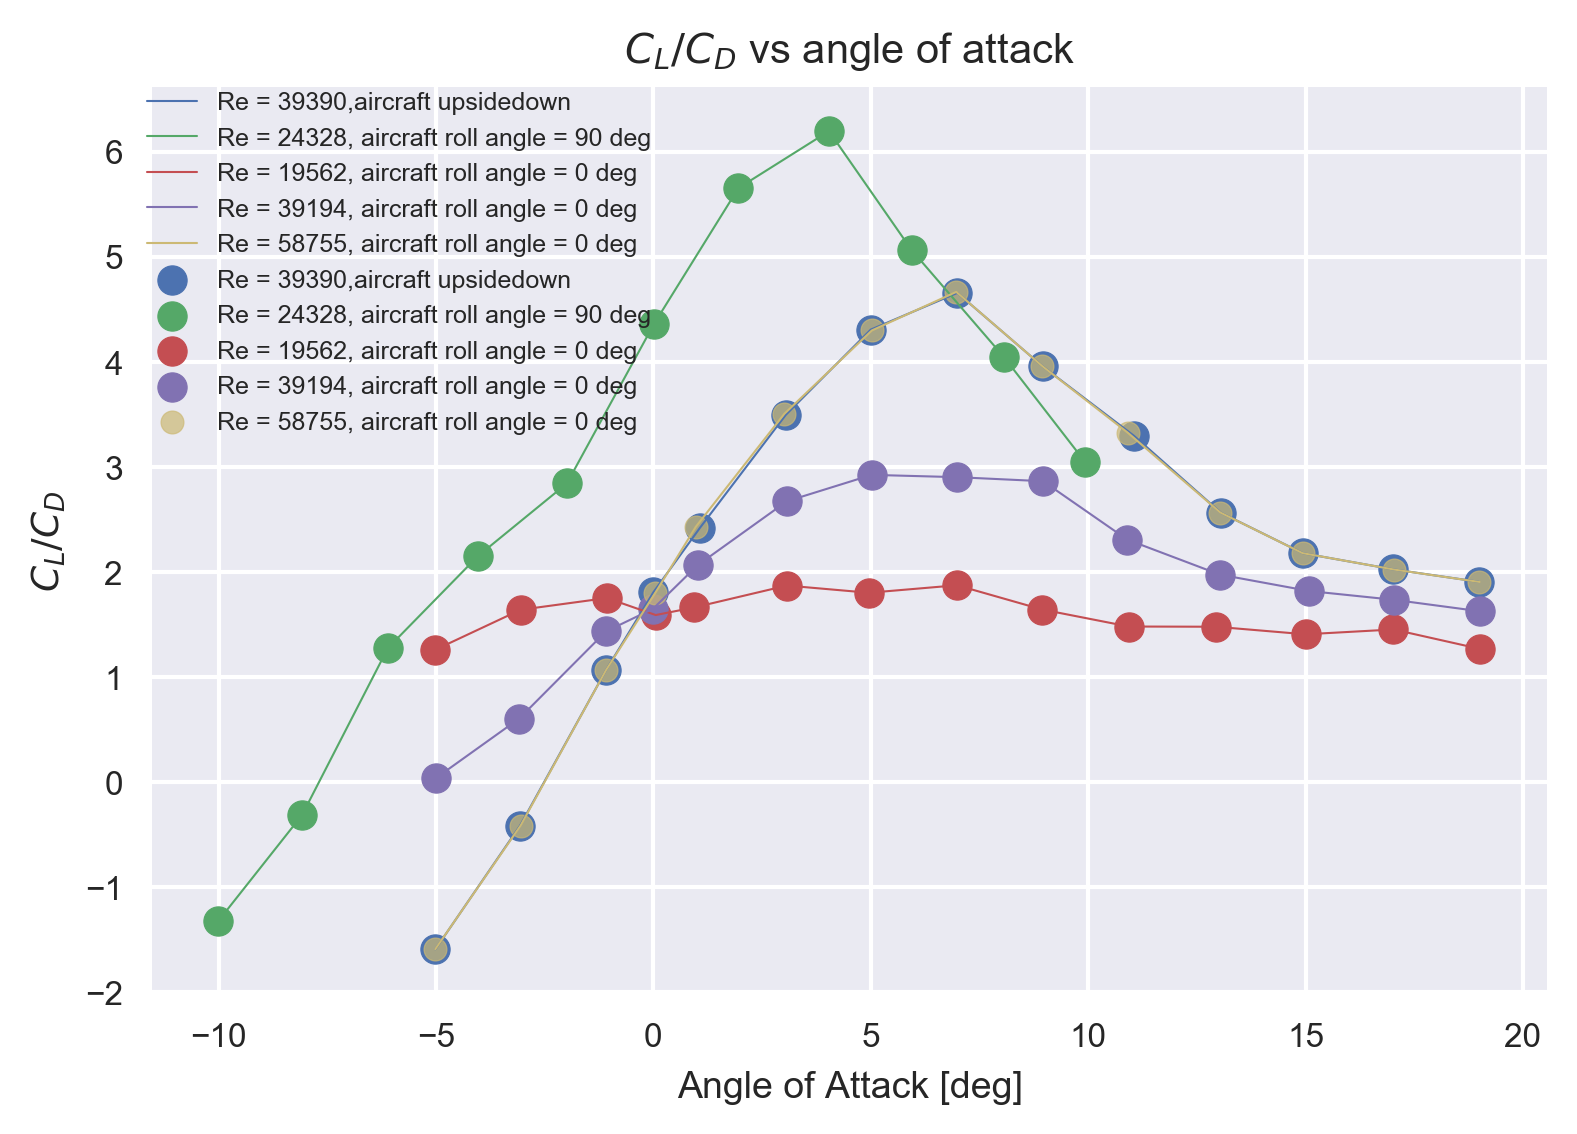

In [149]:

%matplotlib inline
plt.figure(dpi=300);
plt.scatter(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')
plt.plot(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')

plt.scatter(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')
plt.plot(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')

plt.scatter(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')
plt.plot(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')

plt.scatter(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')
plt.plot(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')

plt.scatter(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg',alpha=0.7,s=30)
plt.plot(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg')
#sns.lineplot(x='Lift Coef',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s');
plt.legend(fontsize=6,loc = 'upper left',bbox_to_anchor=(-0.02, 0.02, 0.5, 1.0))
#plt.ylim(-2,5)
#plt.yticks(np.arange(0.2,1.7,step=0.2));
#plt.xticks(np.arange(-0.8,3.0,step=0.2));
plt.ylabel('$C_L/C_D$',fontsize=9);
plt.xlabel('Angle of Attack [deg]',fontsize=9);
plt.title('$C_L/C_D$ vs angle of attack',fontsize=10);
plt.savefig('lift-to-drag.png',dpi=300);

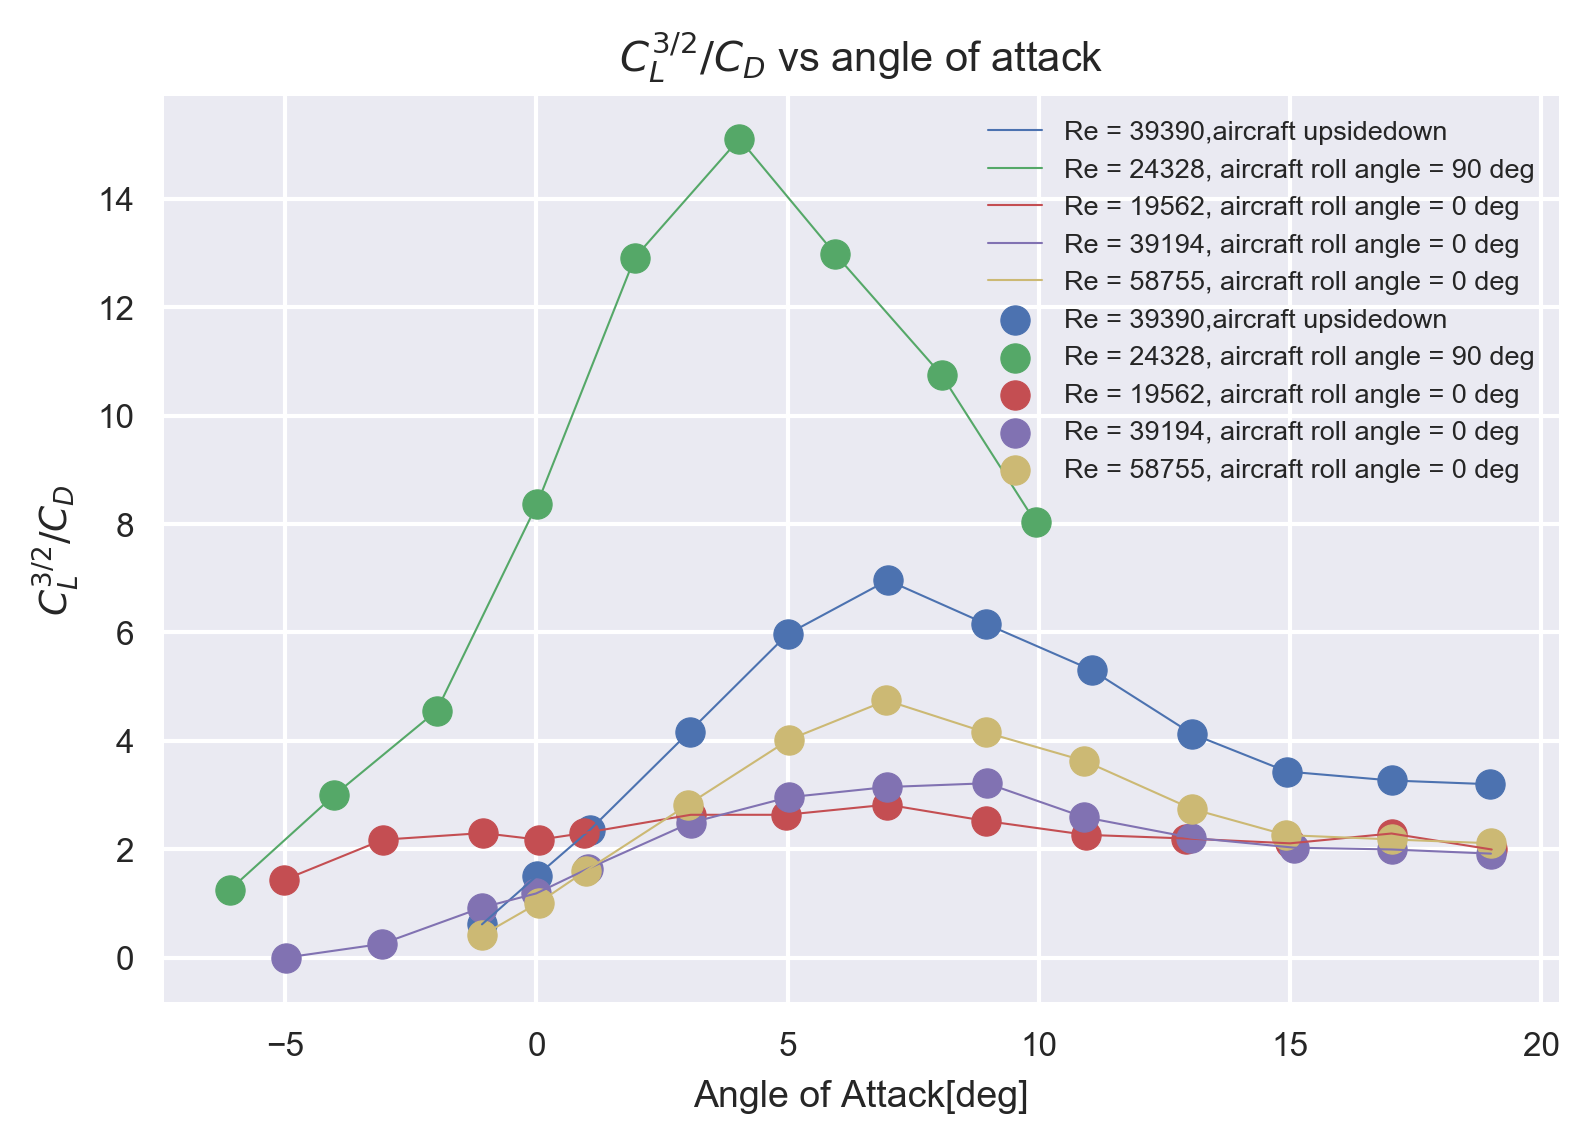

In [150]:
# plot C_L^(3/2)/C_D:

%matplotlib inline
plt.figure(dpi=300);
plt.scatter(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']**(3/2)/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')
plt.plot(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']**(3/2)/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')

plt.scatter(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']**(3/2)/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')
plt.plot(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']**(3/2)/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')

plt.scatter(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']**(3/2)/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')
plt.plot(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']**(3/2)/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')

plt.scatter(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']**(3/2)/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')
plt.plot(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']**(3/2)/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')

plt.scatter(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']**(3/2)/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg')
plt.plot(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']**(3/2)/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg')
#sns.lineplot(x='Lift Coef',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s');
plt.legend(fontsize=6.5,loc = 'upper right')#bbox_to_anchor=(0.55, 0.0, 0.5, 1.0))
#plt.ylim(-2,5)
#plt.yticks(np.arange(0.2,1.7,step=0.2));
#plt.xticks(np.arange(-0.8,3.0,step=0.2));
plt.ylabel('$C_L^{3/2}/C_D$',fontsize=9);
plt.xlabel('Angle of Attack[deg]',fontsize=9);
plt.title('$C_L^{3/2}/C_D$ vs angle of attack',fontsize=10);
plt.savefig('lift_drag_range.png',dpi=300);

# Question 5. Neutral point

### Neutral point is an analogous aerodynamic center for the entire aircraft; note that all the aerodynamic properties above are derived based on wind tunnel data for the entire aicraft prototype, not only the wings

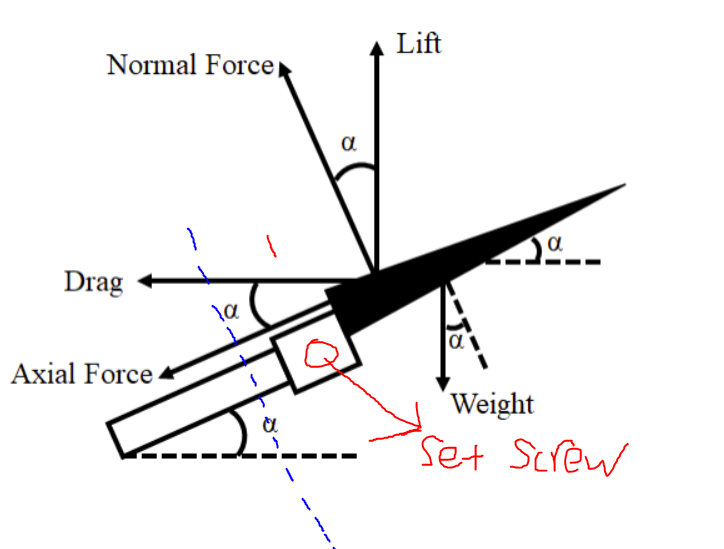

### the pitching moment is measured relative to a point 0.62'' behind the set screw (0.05166667 ft), we can then find the moment arm for the normal force $N$ that caues the pitching moment, which is the center of pressure

In [108]:
df_list[1].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]',
       'Lift[Lbf]', 'Drag[Lbf]', 'Lift Coef', 'Drag Coef', 'Moment Coef'],
      dtype='object')

In [121]:
#first convert in-lbf to ft-lbf
#the reference origin is the point 0.62'' behind the set screw
x_cp1 = df_list[1]['Pitching Mom[in-Lbf]']*0.083333 / df_list[1]['Normal Force[Lbf]']
x_cp2 = df_list[2]['Pitching Mom[in-Lbf]']*0.083333 / df_list[2]['Normal Force[Lbf]']
x_cp3 = df_list[3]['Pitching Mom[in-Lbf]']*0.083333 / df_list[3]['Normal Force[Lbf]']

In [122]:
x_cp1

1    -0.063155
2    -0.330852
3     5.145811
4     1.752307
5     0.604164
6     0.162499
7     0.116039
8     0.095528
9     0.096242
10    0.090359
11    0.082116
12    0.074637
13    0.070196
14    0.065175
dtype: float64